## Does the number of presented infections depends on the number of MHC genes? Regression slope analysis

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    sys.path.insert(0, "/home/piotr/CodeProjects/mhcevolution/PyScripts/")
except Exception:
    pass
try:
    sys.path.insert(0, "/home/piotr/MHCevo/PyScripts/")
except Exception:
    pass

In [3]:
import infection_vs_MHC_stats as ims

In [4]:
cd /media/piotr/Elements/MHC_UAM/3200Antig

/media/piotr/Elements/MHC_UAM/3200Antig


**The input files are obtained by running `infection_vs_MHC_stats.py` on the simulation results data.**

In [5]:
data_002 = ims.importComputedData("0.02_InfectionStats.csv")
data_008 = ims.importComputedData("0.08_InfectionStats.csv")

In [6]:
print("There are", len(data_002), 'data entries in total\n')
print(data_002.dtype)
print(" ")
print("There are", len(data_008), 'data entries in total\n')
print(data_008.dtype)

There are 240 data entries in total

[('VAR', '<f8'), ('VARX', '<f8'), ('slope', '<f8'), ('intercept', '<f8'), ('R2', '<f8'), ('p', '<f8'), ('sd_err', '<f8'), ('pathoNumb', '<f8')]
 
There are 239 data entries in total

[('VAR', '<f8'), ('VARX', '<f8'), ('slope', '<f8'), ('intercept', '<f8'), ('R2', '<f8'), ('p', '<f8'), ('sd_err', '<f8'), ('pathoNumb', '<f8')]


In [7]:
def plotBoxesSlopes(handyArr, xlabels="X values", ylabels="Y values", medColor='C1', yMax=0):
    """ Read the handyType type array and plots box plots of
    regression slopes calculated by the script  infection_vs_MHC_stats.py. Use
    function importComputedData() to import the computed data from file."""
    if handyArr.dtype == ims.handyType:
        spp = np.unique(handyArr['VARX'])
    else:
        print("ERROR in plotHistograms(): wrong numpy data type. It should",
              "be:", ims.handyType)
        return None
    lbls = spp.astype(int)
    ll = []
    fs = 25
    tkfs = fs-3
    #plt.figure(figsize=(9, 6))
    for itm in spp:
        ll.append(handyArr[handyArr['VARX'] == itm]['slope'])
    boxprops = dict(linestyle='-', linewidth=2.5, color='k')
    medianprops = dict(linestyle='-', linewidth=3.5, color=medColor)
    whiskerprops = dict(linewidth=2.5)
    capprops = dict(linewidth=2.5)
    flierprops = dict(markersize=10)
    plt.boxplot(ll, labels=lbls, boxprops=boxprops, medianprops=medianprops,
                whiskerprops=whiskerprops, capprops=capprops,
                flierprops=flierprops)
    plt.xlabel(xlabels, fontsize=fs)
    plt.ylabel(ylabels, fontsize=fs)
    plt.xticks(fontsize=tkfs)
    plt.yticks(fontsize=tkfs)
    if yMax > 0:
        plt.ylim(top=yMax)
    plt.grid(axis='y')
    #plt.show()
    
def fourPlot(data_002, data_008, x_labl, y_labl, y_max=1.5):
    fs = 27
    plt.figure(figsize=(24, 18))
    data = data_002[data_002["VAR"] == 1e-05]
    plt.subplot(221)
    plotBoxesSlopes(data, '', y_labl, "C0", y_max)
    plt.title(r"       $\alpha = 0.02$    $\mu_{A} = 10^{-5}$", fontsize=fs, loc='left')
    data = data_002[data_002["VAR"] == 5e-05]
    plt.subplot(223)
    plotBoxesSlopes(data, x_labl, y_labl, "C1", y_max)
    plt.title(r"       $\alpha = 0.02$    $\mu_{A} = 5\cdot10^{-5}$", fontsize=fs, loc='left')
    data = data_008[data_008["VAR"] == 1e-05]
    plt.subplot(222)
    plotBoxesSlopes(data, '', '', "C2", y_max)
    plt.title(r"       $\alpha = 0.08$    $\mu_{A} = 10^{-5}$", fontsize=fs, loc='left')
    data = data_008[data_008["VAR"] == 5e-05]
    plt.subplot(224)
    plotBoxesSlopes(data, x_labl, '', "C3", y_max)
    plt.title(r"       $\alpha = 0.08$    $\mu_{A} = 5\cdot10^{-5}$", fontsize=fs, loc='left')
    plt.savefig("fig_3.pdf", bbox_inches='tight')
    plt.savefig("fig_3.png", bbox_inches='tight')
    plt.show()

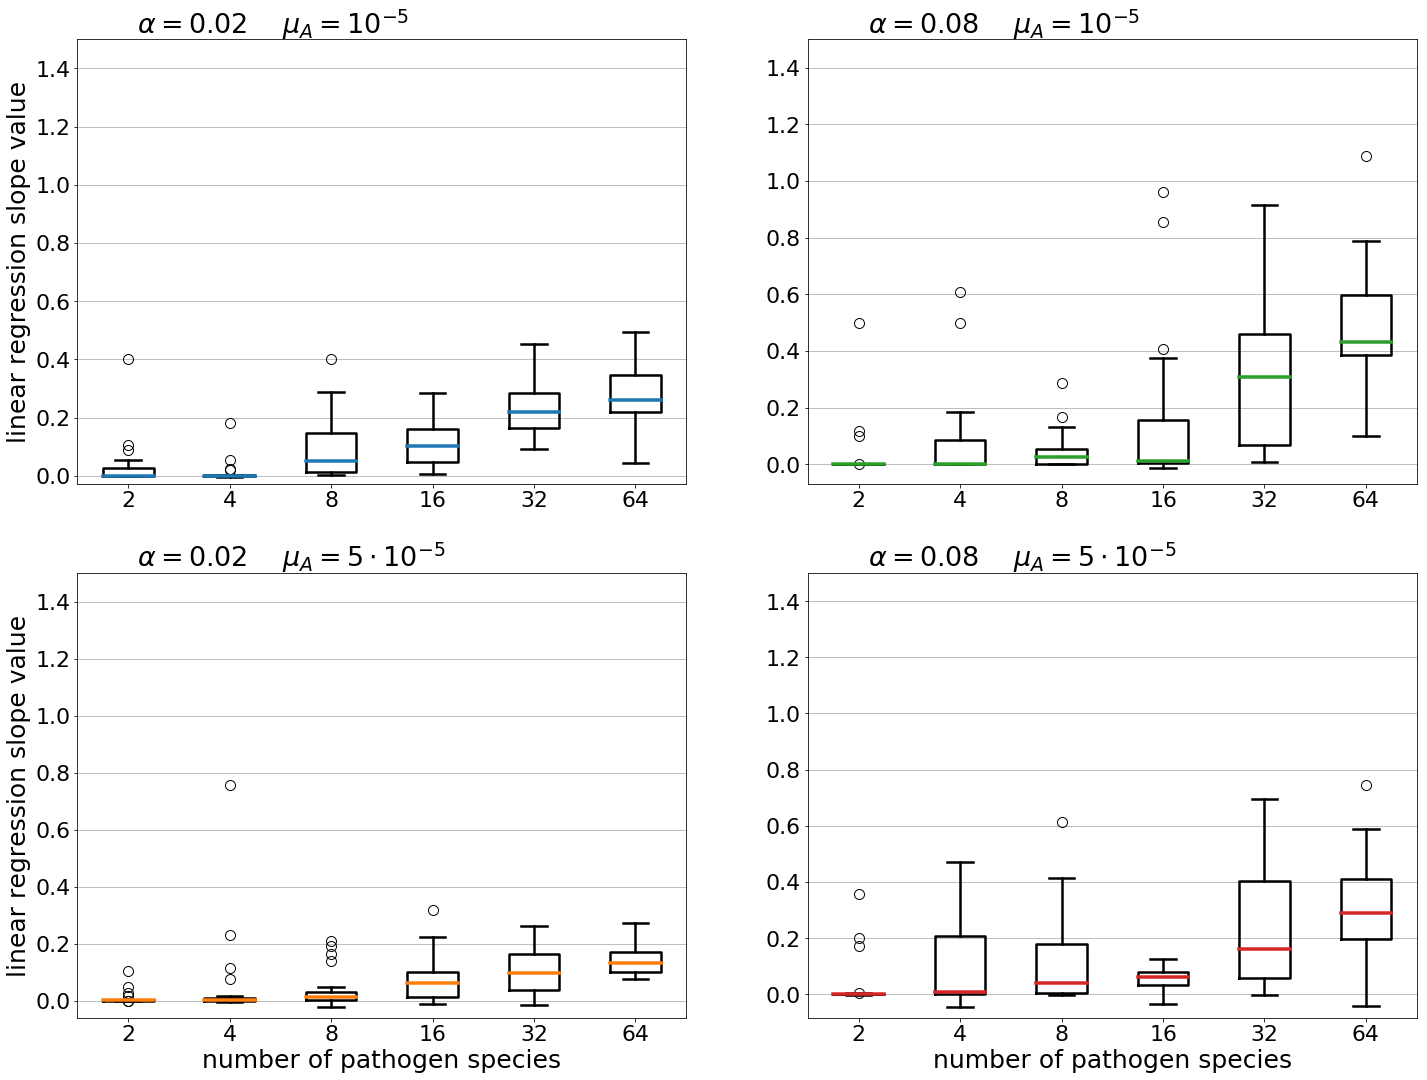

In [8]:
fourPlot(data_002, data_008,
         "number of pathogen species",
         "linear regression slope value")